# COGS 118A - Final Project

# Insert title here

## Group members

- Tai Le
- Stefanie Dao
- Yepeng Li
- Cheng Chang
- Matthew Chong

# Abstract 
Identifying heart related issues is critical in the early stages of human life as taking steps to prevent this type of disease can save millions of lives. Our goal in this project is to predict whether or not a person is at risk to potentially encounter Heart Disease. This data represents critical factors regarding a person's health status such as cholesterol level and heart rate, as well as other detrimental health related activities such as smoking. Using this data we will perform exploratory data analysis to learn more about potential patterns of the dataset as well as perform feature extraction/selection accordingly. We will also apply various models such as decision Tree, K-Nearest-Neighborhood, Neural Network, and Logisitic Regression to determine which algorithm performs the best, and then use it to classify if an individual will potentially encounter some form of Heart Disease in the future. Within each classification algorithm we will first find the best settings to maximize performance and then each performance will be benchmarked against one another to find the best solution.

# Background

Heart disease also known as cardiovascular disease, is one of the main reason for the deaths of many indivduals around the world. Most noteably about 82% of deaths in low to middle income countries split relatively even between male and females<a name="hajar"></a>[<sup>[1]</sup>](#hist). Studies looking into the causes of heart disease has been excercised ever since the death of US President Franklin D. Roosevelt who was a victim to this, the lack of preparation to counter this disease proved our lack of knowledge towards it. Research into the causes of heart disease has been done within the town of Framingham where they found that vicitims commonly had a combination of high blood pressure, smoking, obesity and high blood cholesterol. It's emphasized that there is no sole reason for the cause of heart disease in addition to the above universally applying to other racial and ethnic groups. The Framingham organization in addition to Journal of the American Heart Association has also did a study on cardiovascular disease
where they found that hypertension is one of the primary risk factors which increase probability of stroke, coronary heart disease and heart failure<a name="vaugham"></a>[<sup>[2]</sup>](#hypertensions). The presence of hypertension was in 47.3% of adults in the US between 2015-2018 where ~80% of those individuals had uncontrolled hypertension and this in great risk of heart disease. 

Another study heart disease identification using machine learning algorithms is another example of previous research into this topic where they used ensemble of deep neural networks as a model to classify whether a patient is prone to have heart disease<a name="Tuli"></a>[<sup>[3]</sup>](#diseaseAlg). In this study they took the data from heart patients in the Cleaveland dataset and coresponded known output class in addition to trained model to predict results in real time. Training, validation and testing was split 70:10:20 where they used Nodes to represent their neural networks. This effective algorithm was validated for real-life heart patients were this experience yielded useful data for future investigations on this matter. Knowing this, looking into the causes of this disease is essential for the benefit of hummanity as it can save many lives, with integrating machine learning algorithms to identify heart disease in early stages can potentially prevent the death of others.

# Problem Statement

Heart disease is hard to detect early on. Many times people do not know that they are in critical condition until they have a tachycardia or even stroke. Due to the shortage of doctors and limited availability of healthcare systems in certain areas of the world, it becomes a major problem in the medical field.

Our work aims to use machine learning methods to predict whether or not a patient would potentially have a heart disease based on their basic demographic information and medical history record. The early prognosis of heart disease can help in making decisions on lifestyle changes in high risk patients and reduce complications.

Our task is a classification task. This is a supervised machine learning techinique where class attributes are involved in the construction of the classifier and are used to classify or predict new information. Generally, for every patient, our model's prediction would be 1 if the patient would potentially have heart disease in 10 years and 0 otherwise. To generate such predictions, we will be using different classification models in machine learning such as Losgistic Regression, Decision Tree, K-Nearest Neigbor and Neural Networks. We will use several evaluation metrics including accuracy score, f1 score, and AUC-ROC curve to measure our model's performance.

# Data

### Dataset Introduction

- Our main dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). https://biolincc.nhlbi.nih.gov/studies/framcohort/. 
  - The dataset provides the patients’ information, which includes over 4,000 records and 15 attributes
  - Each observation consists of basic demographic and medical information of each patient
  - Some critical variables are 
    - Sex: male or female (Nominal)
    - Age: Age of the patient(Numerical)
    - Cigs Per Day: the number of cigarettes that the person smoked on average in one day(Numerical)
    - Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    - Sys BP: systolic blood pressure (Numerical)
    - Dia BP: diastolic blood pressure (Numerical)
    - Heart Rate (Numerical)
    - 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)
  - From what we observed, we might need to encode nominal and binary data with one-hot encoding. Before training, we also need to normialize our data and find a way handle imbalanced data if later we discover that the data is highly imbalanced.


### Setup

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA
#from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

# For reproducibility
RAND_STATE = 42

### Data Cleaning

We first do some basic cleaning.

In [2]:
# Get data
data = pd.read_csv('data/CHD_preprocessed.csv')

# Renaming the column names
cols = ['male', 'age', 'education', 'smoker', 'cigs', 
        'bpmeds', 'stroke', 'hypertension', 'diabetes',
        'cholesterol', 'sysbp', 'diabp', 'bmi', 'heartrate',
        'glucose', 'chd']
data.columns = cols

data

,male,age,education,smoker,cigs,bpmeds,stroke,hypertension,diabetes,cholesterol,sysbp,diabp,bmi,heartrate,glucose,chd
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,1,50,0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4129,1,51,1,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4130,0,48,0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4131,0,44,0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0


Since the dataset is already cleaned and properly coded, we will not perform any further cleaning.

### Exploratory Data Analysis (EDA)

Below is the general statistics of this dataset.

In [3]:
data.describe()

,male,age,education,smoker,cigs,bpmeds,stroke,hypertension,diabetes,cholesterol,sysbp,diabp,bmi,heartrate,glucose,chd
count,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000
mean,0.427293,49.557222,0.280668,0.494798,9.101621,0.034358,0.006049,0.311154,0.025647,236.664408,132.367046,82.872248,25.778571,75.925236,81.946528,0.151948
std,0.494745,8.561628,0.449380,0.500033,11.918440,0.182168,0.077548,0.463022,0.158100,43.909188,22.080332,11.952654,4.074360,12.049188,22.860954,0.359014
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Let's look at the statistics of individual classes:

In [4]:
positive = data[data['chd'] == 1]
negative = data[data['chd'] == 0]

In [5]:
positive.describe()

,male,age,education,smoker,cigs,bpmeds,stroke,hypertension,diabetes,cholesterol,sysbp,diabp,bmi,heartrate,glucose,chd
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.0
mean,0.525478,54.173567,0.251592,0.514331,10.581210,0.074841,0.017516,0.507962,0.062102,245.307325,143.774682,86.995223,26.472812,76.507962,88.345541,1.0
std,0.499749,8.008178,0.434274,0.500193,12.961165,0.263344,0.131288,0.500335,0.241533,47.873133,26.851766,14.137369,4.454779,12.231614,39.501560,0.0
min,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.960000,50.000000,40.000000,1.0
25%,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214.000000,125.000000,78.000000,23.580000,68.000000,73.000000,1.0
50%,1.000000,55.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,241.000000,139.000000,85.000000,26.050000,75.000000,80.000000,1.0
75%,1.000000,61.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,271.000000,158.000000,95.000000,28.852500,84.250000,88.250000,1.0
max,1.000000,70.000000,1.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,140.000000,56.800000,120.000000,394.000000,1.0


In [6]:
negative.describe()

,male,age,education,smoker,cigs,bpmeds,stroke,hypertension,diabetes,cholesterol,sysbp,diabp,bmi,heartrate,glucose,chd
count,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.0
mean,0.409700,48.730100,0.285877,0.491298,8.836519,0.027104,0.003994,0.275892,0.019116,235.115835,130.323110,82.133524,25.654182,75.820827,80.800000,0.0
std,0.491849,8.394026,0.451896,0.499996,11.704058,0.162410,0.063083,0.447026,0.136951,42.984636,20.454837,11.362873,3.990325,12.014991,18.122512,0.0
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.0
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,116.000000,74.000000,22.980000,68.000000,72.000000,0.0
50%,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,127.000000,81.000000,25.230000,75.000000,79.000000,0.0
75%,1.000000,55.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,261.000000,141.000000,88.000000,27.830000,83.000000,85.000000,0.0
max,1.000000,70.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,453.000000,243.000000,142.500000,51.280000,143.000000,386.000000,0.0


This provides us a general feel of the relationship between the classes. From the above statistics, we can see that the positive class on average has a higher heart rate, cigaretts smoke, glucose, and cholesterol level. However, we need to also keep in mind the count of each class (this dataset is not balanced), which will be discussed later.

Using the above statistics, we will visualize some of the variables with respect to CHD (Corollary Heart Disease class).

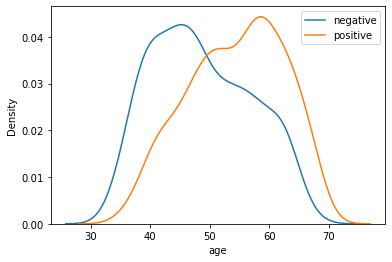

In [7]:
ax = sns.kdeplot(data['age'][data['chd'] == 0].sample(n=500), label='negative')
ax = sns.kdeplot(data['age'][data['chd'] == 1].sample(n=500), label='positive')
ax.legend()

This shows how age might play a role in the classification since the distribution of age for the positive class is denser towards the older age.

Next, we will look at the relationship between prevalent hypertension and our target classification variable (CHD).

In [8]:
# Creating a dataframe containing hypertension count for each class
hyp_chd_0 = data['hypertension'][data['chd'] == 0]
hyp_chd_1 = data['hypertension'][data['chd'] == 1]
hyp_chd = np.array([[0, hyp_chd_0.sum(), len(hyp_chd_0) - hyp_chd_0.sum()],
                    [1, hyp_chd_1.sum(), len(hyp_chd_1) - hyp_chd_1.sum()]])

hyp_chd = pd.DataFrame(hyp_chd, columns=['chd_class', 'hypertension', 'no hypertension'])
hyp_chd

,chd_class,hypertension,no hypertension
0,0,967,2538
1,1,319,309


<AxesSubplot:xlabel='chd_class'>

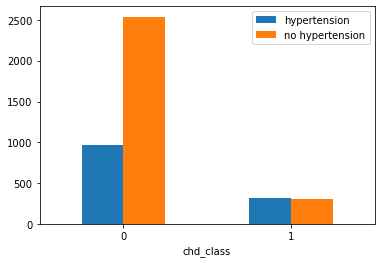

In [9]:
hyp_chd.plot(x='chd_class', y=['hypertension', 'no hypertension'], kind='bar', rot=0)

From the above plot, we can see that there are a lot more people with no prevalent hypertension for the negative class. As seen in the statistics table, the proportion of people in the positive class with prevalent hypertension is generally higher. However, this is by looking at the entire dataset, which is unbalanced. We will sample 500 from each class and replot the statistics below:

In [10]:
hyp_chd_0 = data['hypertension'][data['chd'] == 0].sample(n=500)
hyp_chd_1 = data['hypertension'][data['chd'] == 1].sample(n=500)

hyp_chd500 = np.array([[0, hyp_chd_0.sum(), len(hyp_chd_0) - hyp_chd_0.sum()],
                       [1, hyp_chd_1.sum(), len(hyp_chd_1) - hyp_chd_1.sum()]])

hyp_chd500 = pd.DataFrame(hyp_chd500, columns=['chd_class', 'hypertension', 'no hypertension'])
hyp_chd500

,chd_class,hypertension,no hypertension
0,0,146,354
1,1,257,243


<AxesSubplot:xlabel='chd_class'>

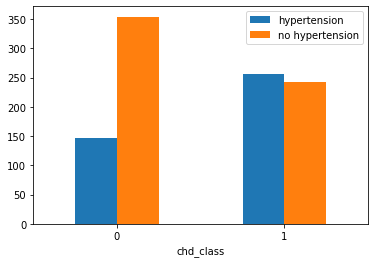

In [11]:
hyp_chd500.plot(x='chd_class', y=['hypertension', 'no hypertension'], kind='bar', rot=0)

Here, we again see the pattern where there are more people with no prevalent hypertension in the negative class. Even though this is more balanced in terms of the amount of data points of each class, it might still be too small of a sample. Thus, we need to keep in mind this small sample size when infering the result above.

Let's make some quick visualizations of a few variables:

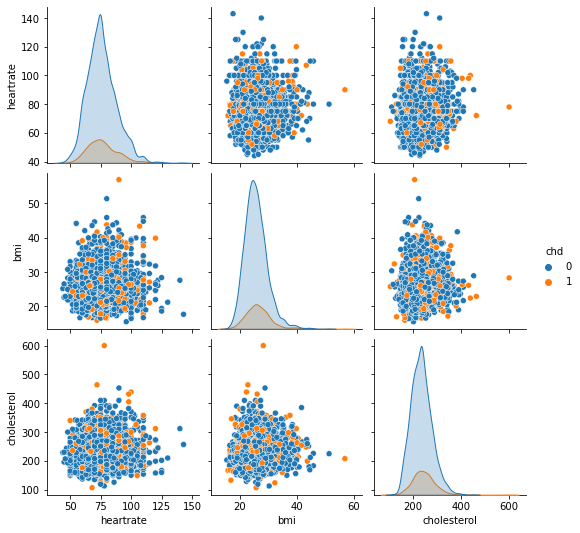

In [12]:
d1 = data[['heartrate', 'bmi', 'cholesterol', 'chd']]

sns.pairplot(d1, hue='chd')

From the above pairplot, we can see how the height of the distributions of heart rate, BMI, and cholesterol level is generally shorter for people with 10-year risk of corollary heart disease. However, there might be some external factors that contributed to the difference in those distributions. Let's first look at the mean from each class:

In [13]:
print("Mean heart rate for negative class: ", d1['heartrate'][d1['chd'] == 0].mean())
print("Mean heart rate for positive class: ", d1['heartrate'][d1['chd'] == 1].mean())

print("Max heart rate for negative class: ", d1['heartrate'][d1['chd'] == 0].max())
print("Max heart rate for positive class: ", d1['heartrate'][d1['chd'] == 1].max())

print("Median heart rate for negative class: ", d1['heartrate'][d1['chd'] == 0].median())
print("Median heart rate for positive class: ", d1['heartrate'][d1['chd'] == 1].median())

Mean heart rate for negative class:  75.82082738944365
Mean heart rate for positive class:  76.50796178343948
Max heart rate for negative class:  143.0
Max heart rate for positive class:  120.0
Median heart rate for negative class:  75.0
Median heart rate for positive class:  75.0


We can see that the statistics of both classes are very similar. Thus, the difference in distributions can be explained by the density of each class given that we saw how there are way more people in the negative class. In other words, the taller density distribution of the negative class around the mean simply means that there are more data points of that class.

Let's quickly look at the distribution of the classes:

<AxesSubplot:>

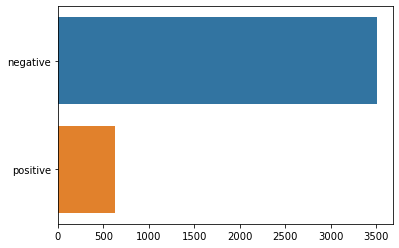

In [14]:
sns.barplot(x=data['chd'].value_counts().values, y=['negative', 'positive'], orient='h')

We can see that the distribution of classes is heavily uneven and there are way more negative than positive classes.

Now, let us sample 500 data points from each class and re-plot the pairplot:

In [15]:
negative_indices = np.array(d1['chd'][d1['chd'] == 0].sample(n=500).index)
positive_indices = np.array(d1['chd'][d1['chd'] == 1].sample(n=500).index)
indices = np.append(negative_indices, positive_indices)
d2 = data[['heartrate', 'bmi', 'cholesterol', 'chd']].to_numpy()[indices]

In [16]:
d2.shape

(1000, 4)

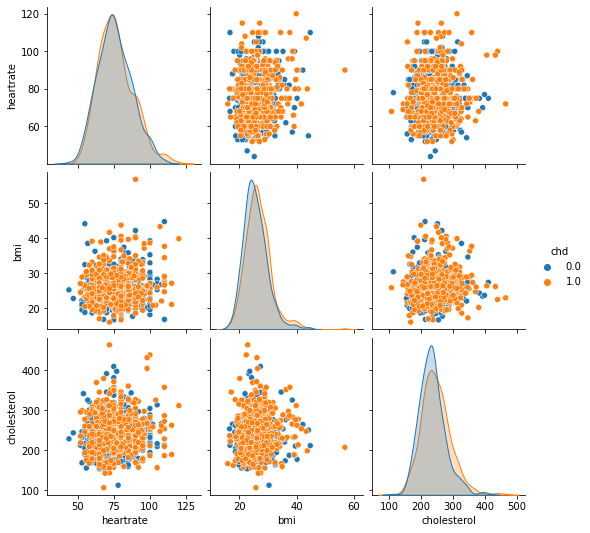

In [17]:
d2 = pd.DataFrame(d2, columns=['heartrate', 'bmi', 'cholesterol', 'chd'])

sns.pairplot(d2, hue='chd')

Here, we can see that the density distributions of both classes are very similar which matches our expectation using the statistics earlier. However, this doesn't tell us anything useful since the distributions are similar and there is little to no correlation between the variables. Let's add a few more variables.

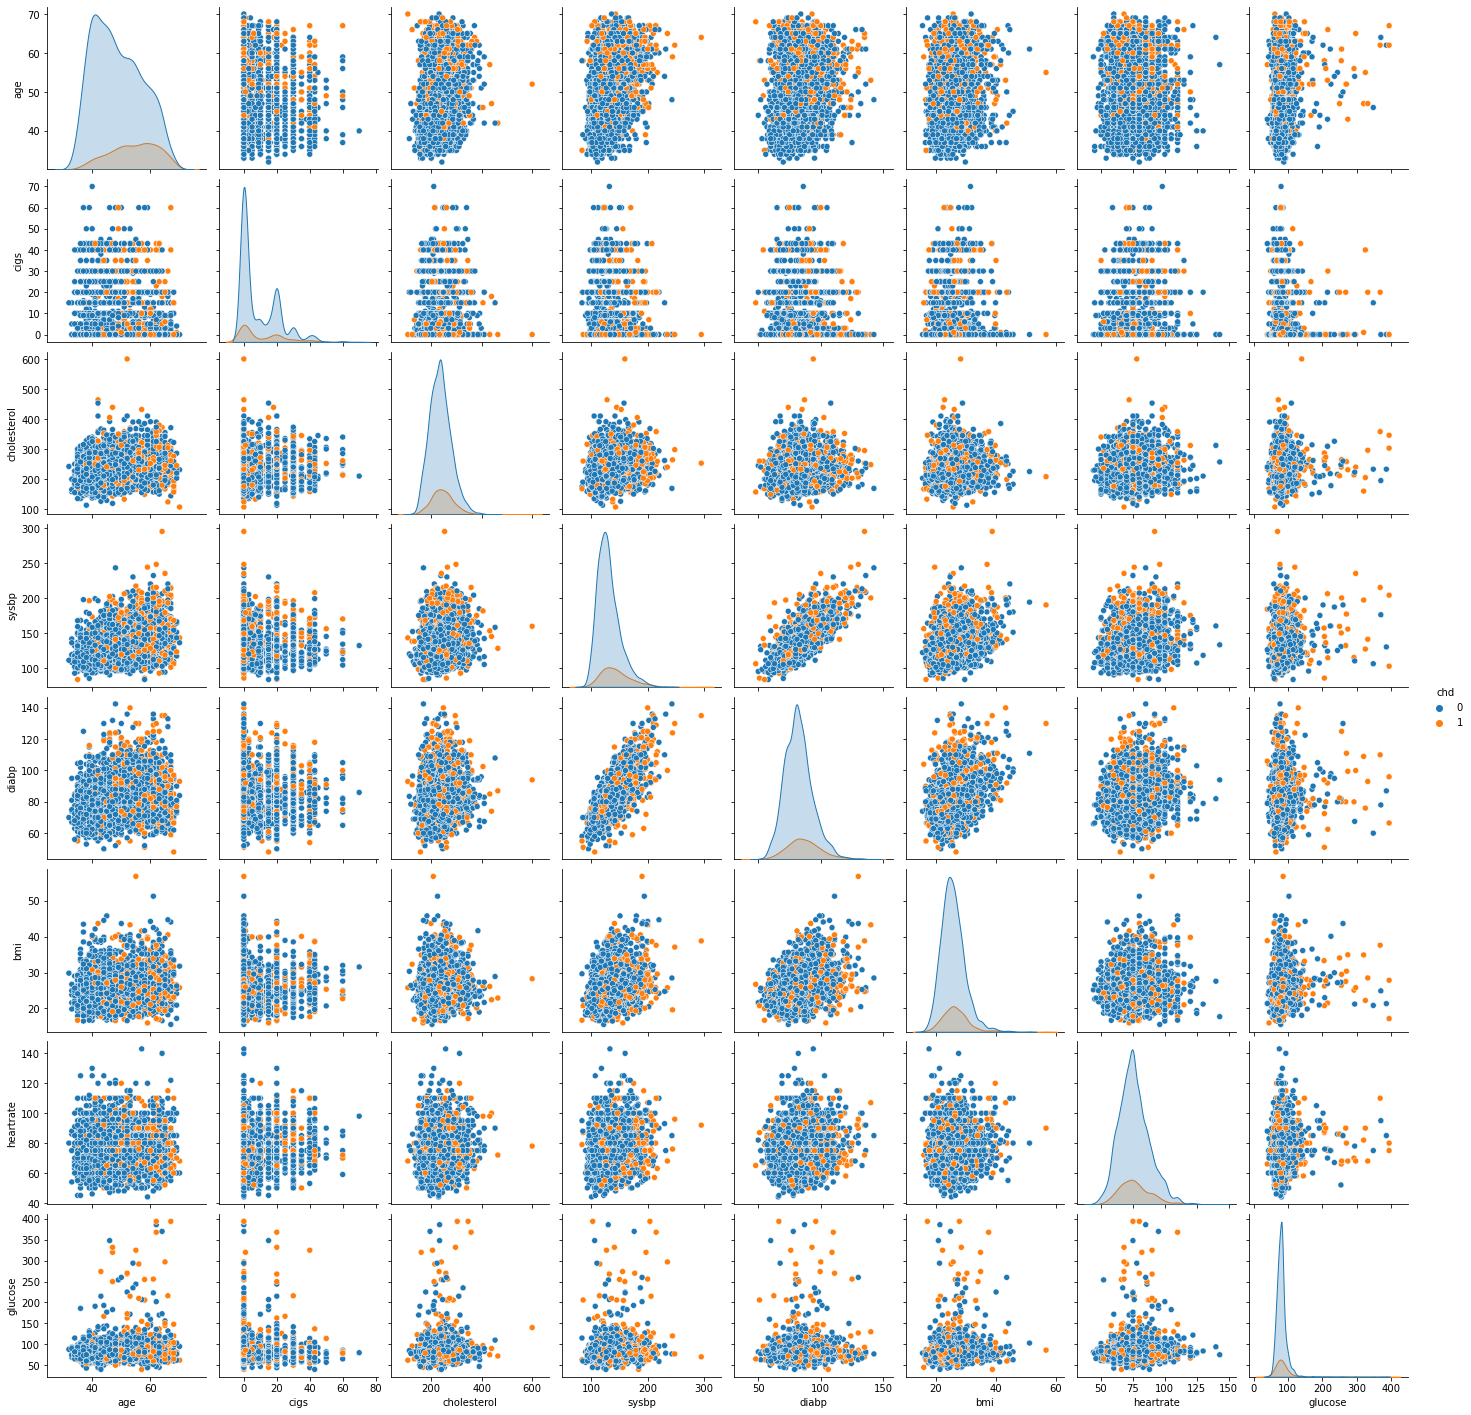

In [18]:
d3 = data[['age', 'cigs','cholesterol', 'sysbp', 'diabp', 'bmi', 'heartrate', 'glucose', 'chd']]

sns.pairplot(d3, hue='chd')

By just eyeballing the plots, we can see that there might be some positive correlation between systolic blood pressure (sysbp) and diastolic blood pressure (diabp). Let's get the correlation coefficient for each variable:

In [19]:
d3.corr()

,age,cigs,cholesterol,sysbp,diabp,bmi,heartrate,glucose,chd
age,1.000000,-0.192079,0.266915,0.394675,0.209126,0.135138,-0.008788,0.116543,0.228260
cigs,-0.192079,1.000000,-0.024522,-0.089390,-0.055252,-0.088904,0.072660,-0.054101,0.052555
cholesterol,0.266915,-0.024522,1.000000,0.210655,0.168231,0.115800,0.089570,0.047502,0.083328
sysbp,0.394675,-0.089390,0.210655,1.000000,0.784691,0.324970,0.186476,0.136629,0.218715
diabp,0.209126,-0.055252,0.168231,0.784691,1.000000,0.377639,0.185271,0.060629,0.146028
bmi,0.135138,-0.088904,0.115800,0.324970,0.377639,1.000000,0.070467,0.078100,0.072134
heartrate,-0.008788,0.072660,0.089570,0.186476,0.185271,0.070467,1.000000,0.087127,0.020474
glucose,0.116543,-0.054101,0.047502,0.136629,0.060629,0.078100,0.087127,1.000000,0.118497
chd,0.228260,0.052555,0.083328,0.218715,0.146028,0.072134,0.020474,0.118497,1.000000


There is indeed a positive correlation between sysbp and diabp. However, upon looking at their definitions, they seem to be measuring blood presure at different states of the heart (beating and resting). Thus, further research is necessary to determine the significance of this correlation.

For the rest of the EDA, we tried to transform the data using $log_{10}$ scale and sklearn normalization using $L_2$ norm to see if there are any other significant findings. The results were similar to the data prior to transformation, and thus we will not include them here.

## Proposed Solution 

In order to achieve the best possible solution for our problem, we will first perform an algorithm selection process where we will be applying different classification algorithms and benchmarking their performance against one another. The performance of these algorithms will indicate whether one of them is appropriate to use as our solution. Below are the models that we will be using:

- Benchmark model: Logistic Regression 
  - This algorithm classifies the two classes using a logistic function and a linear decision boundary. The logistic function (or sigmoid): $$\sigma(k) = \frac{1}{1+e^{-k}}$$ turns a predicted value into a probability value that indicates how likely it is for that prediction to belong to a certain class. The input value $k$ is the predicted value using the linear function $\textbf{w}^T\textbf{x+b}$ that defines the decision boundary. The optimal $\textbf{w}$ for our linear decision boundary can be found by minimizing the appropriate loss function for logistic regression.
  
- Model 1: Decision Tree
  - This algorithm classifies the labels by recursively building a decision tree. The branches are split based on the amount of information gain from each scenario, and our goal is to maximize the information gain from each split. Below is the mathematical expression of the information maximization: $$argmax_B G(S,B) = H(S) - \sum_{i=1}^t \frac{|S_i|}{|S|} H(S_i)$$ where $B$ is the configuration that splits the data points, $S$ is the data points setting of current split, each $S_i$ belongs to the data points setting of a branch $i$, and $H(S)$ determines the uncertainty/information of $S$. We will be using sklearn for this algorithm.

- Model 2: k-Nearest-Neighborhood
  - This algorithm classifies the data points by first calculating the distance between the input data point and the trained data points. Then, it will select the nearest $k$ (odd) neighbors for majority voting. The new data point is then classified as the label that won the voting.
  
- Model 3: Neural Network
  - Neural Networks are modeled as collections of neurons that are connected in an acyclic graph. In other words, the outputs of some neurons can become inputs to other neurons. Neural Network models are often organized into distinct layers of neurons. In our work, we will be using a simple feed-forward multi-layer network.
  

For all of these algorithms, we will run them separately and benchmark each of their performance against our baseline to find out which is the most appropriate algorithm that we should use to solve our problem. For each of these, we will perforem several  metrics (described in below section) to evaluate the performance of our models. The algorithm with the best performance will be our solution.

## Evaluation Metrics 

To quantify the performance of our models, we will is 3 evaluation metrics including Accuracy, AUC-ROC and F1 score.



*   As our main task is to do classification, we want to we want the predicted probability $p_\theta(y_i = 1|x_i)$ to be as close as possible to the label $y_i$. In other words, we want to maximize the model's accuracy, which measures how many observations, both positive and negative, were correctly classified. 
$$ accuracy(y, f_\theta(X)) = \frac{1}{|y|} \sum^{|y|}_{i= 1} \omega
(f_0(x_i) = y_i)$$
where $\omega$ is an indicator function, and $f_\theta(x_i)$ is the binarized output of the mode \\

* With highly imbalanced dataset however, relying on the model's accuracy alone would not yield a good prediction. Therefore, we can use an additional measure called $F_1$ score to balance precision (i.e the rate that items predicted to have a positive label by the classifier are in fact labeled positively) and recall (i.e  the rate that all positively-labeled items our classifier predicted as having a positive label). Formally, we'll have:
$$F_\beta = (1+\beta^2) \frac{precision \times recall}{\beta^2 precision + recall}$$
Here we are choosing $\beta = 1$ because we care equally about precision and recall. 

* Additionally, not only do we care about the prediction label but also how much the model is capable of distinguishing between classes. Therefore, we can use the AUC (Area Under The Curve) - ROC (Receiver Operating Characteristics) curve to as performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability.
The higher the AUC, the better the model is at distinguishing between patients with the disease and no disease. The curve is plotted with TPR (True Positive Rate, or Precision) against the FPR (False Positive Rate, which is just calculated as 1 - TPR) where TPR is on the y-axis and FPR is on the x-axis.


> 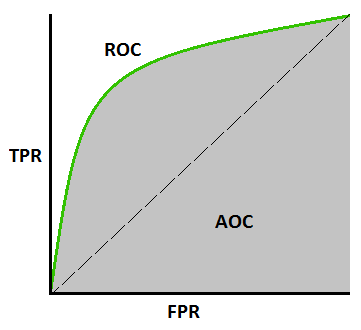

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



# Results

### Preprocessing

We first take out the feature (chd) to be classified and do the train-test split. Because the distribution between class 0 and 1 is uneven, we need to use a stratified split.

In [20]:
X = data.drop("chd", axis=1)
y = np.array(data["chd"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=RAND_STATE, 
                                                    stratify=y)
# Check stratify result
print("training split class 1 ratio", 
      sum(y_train) / len(y_train))
print("testing split class 1 ratio", 
      sum(y_test) / len(y_test))

training split class 1 ratio 0.15184513006654568
testing split class 1 ratio 0.1523579201934704


### Feature Selection
We begin our analysis by first looking at the important features that we should keep. As we can see in the EDA section, there are many features presented in this data that does seem to have a significantly different distrbution between the two groups that we want to classify. Therefore, we want to try some feature selection techniques over this data before selecting the appropiate classification model.

##### Logistic Regression
We try an L1-based feature selection first. This selection technique directly removes features that does not provide a significant conitrbution to the classification power of the naive model (logistic regression) that we are using.

In [21]:
# Check different regularization strength
reg_strength_list = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]

# Fit a logistic regression model with these different strength, 
# get average CV scores from each of them
avg_cv_score_list = []
for reg_strength in reg_strength_list:
    lr = LogisticRegression(penalty="l1", C=reg_strength, solver="liblinear")
    cv_score_list = cross_val_score(lr, X_train, y_train, cv=10, n_jobs=-1)
    avg_cv_score_list.append(np.mean(cv_score_list))

# Get the best C strength
best_reg_idx = np.argmax(avg_cv_score_list)
best_c = reg_strength_list[best_reg_idx]

# Use the best C to fit model and select features, make new feature array 
# with only those features
lr = LogisticRegression(penalty="l1", C=best_c, solver="liblinear")
selector = SelectFromModel(estimator=lr).fit(X_train, y_train)
X_train_l1 = selector.transform(X_train)

print("Before selection", X_train.shape)
print("After selection", X_train_l1.shape)

Before selection (3306, 15)
After selection (3306, 15)


In [22]:
best_c

10

Surprisingly, L1 feature selection result suggests that all features should be kept for the approximated best performance of a logistic regression.

Now we use pricipal component analysis (PCA) to make another attempt at model selection, and see what PCA would tell us to do.

In [23]:
keep_dim_list = [8, 9, 10, 11, 12, 13, 14, 15]

avg_cv_score_list = []
for keep_dim in keep_dim_list:
    pca = PCA(n_components=keep_dim, random_state=RAND_STATE)
    X_train_new = pca.fit_transform(X_train)
    lr = LogisticRegression(penalty="l1", C=best_c, solver="liblinear")
    cv_score_list = cross_val_score(lr, X_train_new, y_train, cv=10, n_jobs=-1)
    avg_cv_score_list.append(np.mean(cv_score_list))

# Get the best C strength
best_reg_idx = np.argmax(avg_cv_score_list)
best_keep_dim = keep_dim_list[best_reg_idx]

print("The best number of dimensions to keep:", best_keep_dim)

The best number of dimensions to keep: 15


It appears that PCA agrees with the L1 feature selection result; we should use all features in this dataset, at least for logistic regressions.

##### k-Nearest-Neighbors

Since kNN suffers from the curse of dimensionality, we will try to perform a dimensionality reduction process using PCA.

First, we visualize the components in the order of percentage of variance explanability.

First 10 components:  0.8819530356296457
[0.0, 0.21556681417957488, 0.34050617004890765, 0.4441111882025609, 0.5190343256129428, 0.5891728364475267, 0.6572917931248382, 0.7243650245897871, 0.7828524566868544, 0.8350468943576714, 0.8819530356296457, 0.9230702954790695, 0.9494413452352825, 0.9747067730744442, 0.9888754573411981]


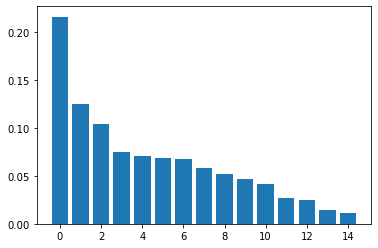

In [24]:
# scaling the training and testing data using the mean and variance of the training set
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualizing PCA using the scaled data
pca_knn = PCA(n_components=X_train_scaled.shape[1], random_state=RAND_STATE)
X_train_pca = pca_knn.fit_transform(X_train_scaled)
plt.bar(range(pca_knn.n_components_), pca_knn.explained_variance_ratio_)

pc_num = 10
print("First {n} components: ".format(n=pc_num), np.sum(pca_knn.explained_variance_ratio_[:pc_num]))

# creating a list of variance ratio with first n components
var_ratio = [np.sum(pca_knn.explained_variance_ratio_[:i]) for i in range(15)]
print(var_ratio)



Using the above, we will perform a cross-validation process to find out which n-components give the best accuracy.

In [25]:
# First we loosely optimize the k-neighbors so that the model is at least not the worst
k_neighbors = [3, 5, 7, 9, 11, 13, 15, 17, 31, 59, 111]

avg_cv_score_list = []
for k in k_neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_score_list = cross_val_score(knn, X_train_pca, y_train, cv=10, n_jobs=-1)
    avg_cv_score_list.append(np.mean(cv_score_list))

best_k_idx = np.argmax(avg_cv_score_list)
best_k = k_neighbors[best_k_idx]

# Now use this k to perform the cross-validation on the pca results
# Based on the pca results, we will only be considering the n-components that explains >= 88% of the data
keep_dim_list = [10, 11, 12, 13, 14]

avg_cv_score_list = []
for keep_dim in keep_dim_list:
    pca = PCA(n_components=keep_dim, random_state=RAND_STATE)
    X_train_new = pca.fit_transform(X_train_scaled)
    knn = KNeighborsClassifier(n_neighbors=best_k)
    cv_score_list = cross_val_score(knn, X_train_new, y_train, cv=10, n_jobs=-1)
    avg_cv_score_list.append(np.mean(cv_score_list))

# Get the best performing n-compoentns
best_n_idx = np.argmax(avg_cv_score_list)
best_keep_dim = keep_dim_list[best_n_idx]

print("Average CV score with best k:", avg_cv_score_list)
print("The best number of dimensions to keep:", best_keep_dim)

Average CV score with best k: [0.8487604138057311, 0.8472461777899845, 0.8472461777899845, 0.8466419481827338, 0.8481561841984803]
The best number of dimensions to keep: 10


Based on this result, we will be keeping the first 10 principle components for kNN, which retains about 88% of the information.

In [26]:
# Performing PCA using the scaled data and keeping first 10 components
pca_knn = PCA(n_components=best_keep_dim, random_state=RAND_STATE)
fitted_pca_model = pca_knn.fit(X_train_scaled)
X_train_pca = fitted_pca_model.transform(X_train_scaled)
X_test_pca = fitted_pca_model.transform(X_test_scaled)

##### Decision Tree Classifier

In [27]:
# Check different criterion list
criterion_list = ['gini', 'entropy']

# Fit a KNN model with these different neighbors, 
# get average CV scores from each of them
avg_cv_score_list = []
for crit in criterion_list:
    dt = DecisionTreeClassifier(criterion=crit, random_state=RAND_STATE)
    cv_score_list = cross_val_score(dt, X_train, y_train, cv=10, n_jobs=-1)
    avg_cv_score_list.append(np.mean(cv_score_list))

# Get the best criterion
best_reg_idx = np.argmax(avg_cv_score_list)
best_crit = criterion_list[best_reg_idx]

# Use the best criterion to fit model and select features, make new feature array 
# with only those features
dt = DecisionTreeClassifier(criterion=best_crit, random_state=RAND_STATE)
selector = SelectFromModel(estimator=dt).fit(X_train, y_train)
X_train_tree = selector.transform(X_train)
X_test_tree = selector.transform(X_test)

print("Before selection", X_train.shape)
print("After selection", X_train_tree.shape)
print("Best criterion: ", best_crit)
print(avg_cv_score_list)

Before selection (3306, 15)
After selection (3306, 7)
Best criterion:  entropy
[0.7477204064817358, 0.759534926302298]


This suggests that there are 7 important features that we should select.

### Model Selection

We will now try to find the settings that would maximize the performance of each of our algorithm using sklearn's GridSearchCV.

##### Logistic Regression

In [28]:
%%capture
model_logistic = LogisticRegression()

# params to perform gridsearch
params_logistic = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10],
    'random_state': [RAND_STATE],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [2000]
}

metrics = {
    'accuracy': 'accuracy',
    'f1': 'f1'
}

# create a gridsearch and fit it
clf_logistic = GridSearchCV(estimator=model_logistic, param_grid=params_logistic, cv=10, scoring=metrics, refit='accuracy')
clf_logistic.fit(X_train, y_train)

In [29]:
scoring_data_logistic = pd.DataFrame(clf_logistic.cv_results_).dropna()[['mean_test_accuracy', 'rank_test_accuracy', 'mean_test_f1', 'rank_test_f1']]
scoring_data_logistic

,mean_test_accuracy,rank_test_accuracy,mean_test_f1,rank_test_f1
2,0.848155,34,0.000000,41
4,0.848155,34,0.000000,41
5,0.849063,22,0.026929,34
6,0.849063,22,0.026929,34
7,0.848155,34,0.000000,41
8,0.848155,34,0.000000,41
9,0.848155,34,0.000000,41
17,0.848155,34,0.000000,41
19,0.848155,34,0.000000,41
20,0.850575,15,0.066838,15


In [30]:
scoring_data_logistic[scoring_data_logistic['rank_test_accuracy'] == 1]

,mean_test_accuracy,rank_test_accuracy,mean_test_f1,rank_test_f1
96,0.854505,1,0.11804,1


We can see that the model that gives the best accuracy also gives the best f1-score (even though f1 is low).

In [31]:
# put the results into a dataframe
res = pd.DataFrame(clf_logistic.cv_results_['params'])
res['score_acc'] = clf_logistic.cv_results_['mean_test_accuracy']
res.dropna().sort_values('score_acc', ascending=False)[:10]

,C,max_iter,penalty,random_state,solver,score_acc
96,10.00,2000,l2,42,lbfgs,0.854505
65,0.10,2000,l2,42,newton-cg,0.854203
92,10.00,2000,l1,42,liblinear,0.854202
95,10.00,2000,l2,42,newton-cg,0.854202
80,1.00,2000,l2,42,newton-cg,0.854202
66,0.10,2000,l2,42,lbfgs,0.853900
97,10.00,2000,l2,42,liblinear,0.853296
77,1.00,2000,l1,42,liblinear,0.853295
81,1.00,2000,l2,42,lbfgs,0.853295
51,0.01,2000,l2,42,lbfgs,0.852692


In [32]:
print(clf_logistic.best_estimator_)
print("Best score: ",  clf_logistic.best_score_)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Best score:  0.8545051725716378


Now, we will use this model to construct a ROC-AUC curve.

Area under the Receiver Operating Characteristic curve: 0.7329438670380183


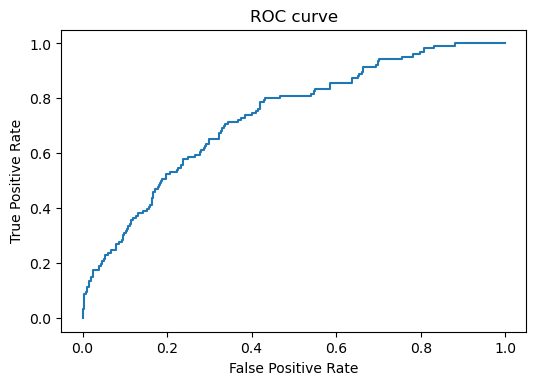

In [33]:
prob = clf_logistic.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=prob[:,1], pos_label=1)
roc_auc = roc_auc_score(y_test, prob[:,1])

plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc)

##### k-Nearest-Neighbors

We repeat the same steps for kNN to find the best model.

In [34]:
model_knn= KNeighborsClassifier()

# params to perform gridsearch
params_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 31, 59, 111],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

metrics = {
    'accuracy': 'accuracy',
    'f1': 'f1'
}

# create a gridsearch and fit it
clf_knn = GridSearchCV(estimator=model_knn, param_grid=params_knn, cv=10, scoring=metrics, refit='accuracy')
clf_knn.fit(X_train_pca, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 31, 59,
                                         111],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit='accuracy',
             return_train_score=False,
             scoring={'accuracy': 'accuracy', 'f1': 'f1'}, verbose=0)

In [35]:
scoring_data_knn = pd.DataFrame(clf_knn.cv_results_).dropna()[['mean_test_accuracy', 'rank_test_accuracy', 'mean_test_f1', 'rank_test_f1']]
scoring_data_knn

,mean_test_accuracy,rank_test_accuracy,mean_test_f1,rank_test_f1
0,0.820026,121,0.186859,1
1,0.819117,124,0.186095,4
2,0.817306,127,0.176997,7
3,0.816701,130,0.176415,10
4,0.833039,109,0.125989,19
...,...,...,...,...
127,0.848155,10,0.000000,109
128,0.848155,10,0.000000,109
129,0.848155,10,0.000000,109
130,0.848155,10,0.000000,109


In [36]:
scoring_data_knn[scoring_data_knn['rank_test_accuracy'] == 1]

,mean_test_accuracy,rank_test_accuracy,mean_test_f1,rank_test_f1
34,0.84876,1,0.007843,100
78,0.84876,1,0.007843,100
122,0.84876,1,0.007843,100


In [37]:
scoring_data_knn[scoring_data_knn['rank_test_f1'] == 1]

,mean_test_accuracy,rank_test_accuracy,mean_test_f1,rank_test_f1
0,0.820026,121,0.186859,1
44,0.820026,121,0.186859,1
88,0.820026,121,0.186859,1


We also get a low f1-score and a high accuracy score for kNN.

In [38]:
# put the results into a dataframe
res = pd.DataFrame(clf_knn.cv_results_['params'])
res['score_acc'] = clf_knn.cv_results_['mean_test_accuracy']
res.dropna().sort_values('score_acc', ascending=False)

,algorithm,n_neighbors,p,weights,score_acc
122,brute,31,2,uniform,0.848760
78,kd_tree,31,2,uniform,0.848760
34,ball_tree,31,2,uniform,0.848760
38,ball_tree,59,2,uniform,0.848457
126,brute,59,2,uniform,0.848457
...,...,...,...,...,...
46,kd_tree,3,2,uniform,0.817306
2,ball_tree,3,2,uniform,0.817306
91,brute,3,2,distance,0.816701
47,kd_tree,3,2,distance,0.816701


In [39]:
print(clf_knn.best_estimator_)
print("Best score: ",  clf_knn.best_score_)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')
Best score:  0.8487604138057311


Area under the Receiver Operating Characteristic curve: 0.6491067182935942


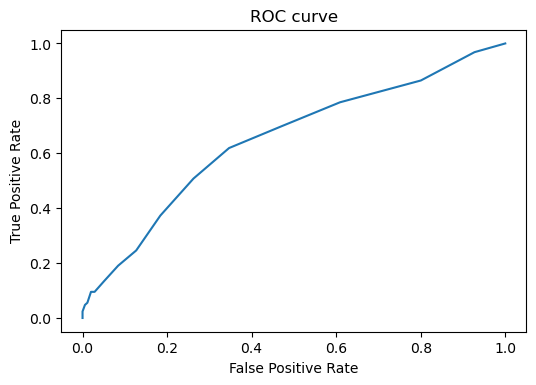

In [40]:
prob = clf_knn.predict_proba(X_test_pca)
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=prob[:,1], pos_label=1)
roc_auc = roc_auc_score(y_test, prob[:,1])

plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc)

##### Decision Tree Classifier

In [41]:
model_dt= DecisionTreeClassifier()

# params to perform gridsearch
params_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [RAND_STATE]
}

metrics = {
    'accuracy': 'accuracy',
    'f1': 'f1'
}

# create a gridsearch and fit it
# using the training set with selected features
clf_dt = GridSearchCV(estimator=model_dt, param_grid=params_dt, cv=10, scoring=metrics, refit='accuracy')
clf_dt.fit(X_train_tree, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [42]:
scoring_data_dt = pd.DataFrame(clf_dt.cv_results_).dropna()[['mean_test_accuracy', 'rank_test_accuracy', 'mean_test_f1', 'rank_test_f1']]
scoring_data_dt

,mean_test_accuracy,rank_test_accuracy,mean_test_f1,rank_test_f1
0,0.752565,112,0.187084,28
1,0.749847,118,0.197626,25
2,0.754985,109,0.212685,13
3,0.787960,91,0.186613,31
4,0.780699,97,0.246621,1
...,...,...,...,...
115,0.849365,1,0.026571,82
116,0.847853,13,0.011469,94
117,0.848154,7,0.003922,109
118,0.847852,19,0.000000,118


In [43]:
scoring_data_dt[scoring_data_dt['rank_test_accuracy'] == 1]

,mean_test_accuracy,rank_test_accuracy,mean_test_f1,rank_test_f1
75,0.849365,1,0.026571,82
95,0.849365,1,0.026571,82
115,0.849365,1,0.026571,82


In [44]:
scoring_data_dt[scoring_data_dt['rank_test_f1'] == 1]

,mean_test_accuracy,rank_test_accuracy,mean_test_f1,rank_test_f1
4,0.780699,97,0.246621,1
24,0.780699,97,0.246621,1
44,0.780699,97,0.246621,1


Again, not much of a higher f1-score.

In [45]:
# put the results into a dataframe
res = pd.DataFrame(clf_dt.cv_results_['params'])
res['score_acc'] = clf_dt.cv_results_['mean_test_accuracy']
res.dropna().sort_values('score_acc', ascending=False)

,criterion,max_features,min_samples_split,random_state,splitter,score_acc
75,entropy,auto,256,42,random,0.849365
115,entropy,log2,256,42,random,0.849365
95,entropy,sqrt,256,42,random,0.849365
39,gini,sqrt,1024,42,random,0.848457
59,gini,log2,1024,42,random,0.848457
...,...,...,...,...,...,...
62,entropy,auto,4,42,best,0.751970
82,entropy,sqrt,4,42,best,0.751970
41,gini,log2,2,42,random,0.749847
21,gini,sqrt,2,42,random,0.749847


In [46]:
print(clf_dt.best_estimator_)
print("Best score: ",  clf_dt.best_score_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=256,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='random')
Best score:  0.8493646434129818


Area under the Receiver Operating Characteristic curve: 0.7017639200235491


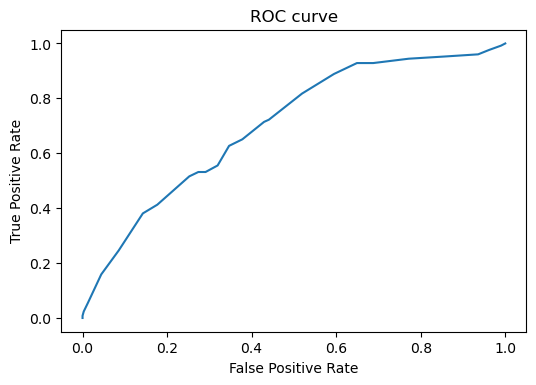

In [63]:
prob = clf_dt.predict_proba(X_test_tree)
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=prob[:,1], pos_label=1)
roc_auc = roc_auc_score(y_test, prob[:,1])

plt.figure(dpi=100)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc)

### Learning Curve
We will now use those resulting models to plot the validation curves.

##### Logistic Regression

In [55]:
%%capture
train_sizes_log, train_scores_log, test_scores_log = learning_curve(estimator=clf_logistic.best_estimator_, X=X_train, y=y_train, cv=10, random_state=RAND_STATE, n_jobs=-1)

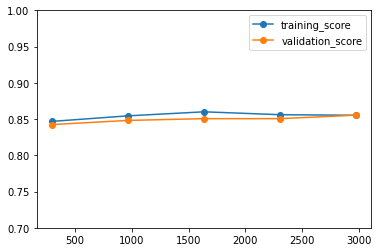

In [71]:
plt.plot(train_sizes_log, np.mean(train_scores_log, axis=1), marker='o', label='training_score')
plt.plot(train_sizes_log, np.mean(test_scores_log, axis=1), marker='o', label='validation_score')
plt.ylim([0.7, 1])
plt.legend()
plt.show()

##### k-Nearest-Neighbors

In [72]:
%%capture
train_sizes_knn, train_scores_knn, test_scores_knn = learning_curve(estimator=clf_knn.best_estimator_, X=X_train_pca, y=y_train, cv=10, random_state=RAND_STATE, n_jobs=-1)

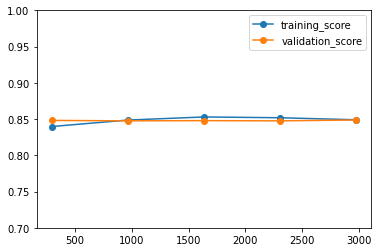

In [73]:
plt.plot(train_sizes_knn, np.mean(train_scores_knn, axis=1), marker='o', label='training_score')
plt.plot(train_sizes_knn, np.mean(test_scores_knn, axis=1), marker='o', label='validation_score')
plt.ylim([0.7, 1])
plt.legend()
plt.show()

##### Decision Tree Classifier

In [74]:
%%capture
train_sizes_dt, train_scores_dt, test_scores_dt = learning_curve(estimator=clf_dt.best_estimator_, X=X_train_tree, y=y_train, cv=10, random_state=RAND_STATE, n_jobs=-1)

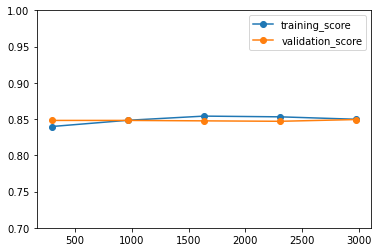

In [75]:
plt.plot(train_sizes_dt, np.mean(train_scores_dt, axis=1), marker='o', label='training_score')
plt.plot(train_sizes_dt, np.mean(test_scores_dt, axis=1), marker='o', label='validation_score')
plt.ylim([0.7, 1])
plt.legend()
plt.show()

Based on the above results, we can see that the validation curves are flat as the amount of training samples increases, suggesting that adding more data would not improve the performance much. Perhaps we should look into different algorithms that could potentially perform better than those 3.

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

The project relies on a dataset with human subjects. The dataset is publically available with the conscents of all test subjects for non-commercial use. All data are removed of personally identifiable information (PII). The only distinguishable feature of each sample is its patient ID, which is untraceable to its PII. All data can be deleted from the Github repository after the final report is genereted if the need arises.

We will be mindful of and try to ensure that no prior knowledge or conceivable personal biases are injected into the models that we will be training over this dataset. We will also try to ensure that we only extract features from the datasets that are not obviously discriminatory to people of any gender, racial, cultural, social, or political groups.

One limitation to this study is that this dataset comes from one town in the state of Massachusetts, so the result cannot be generalized very well to any other part of the world or within the United States. We will talk about this shortcoming in the final report.

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
